# VISION POR COMPUTADOR II - TP
* Cristian Salinas
* Adrián Lapaz

## EDA

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

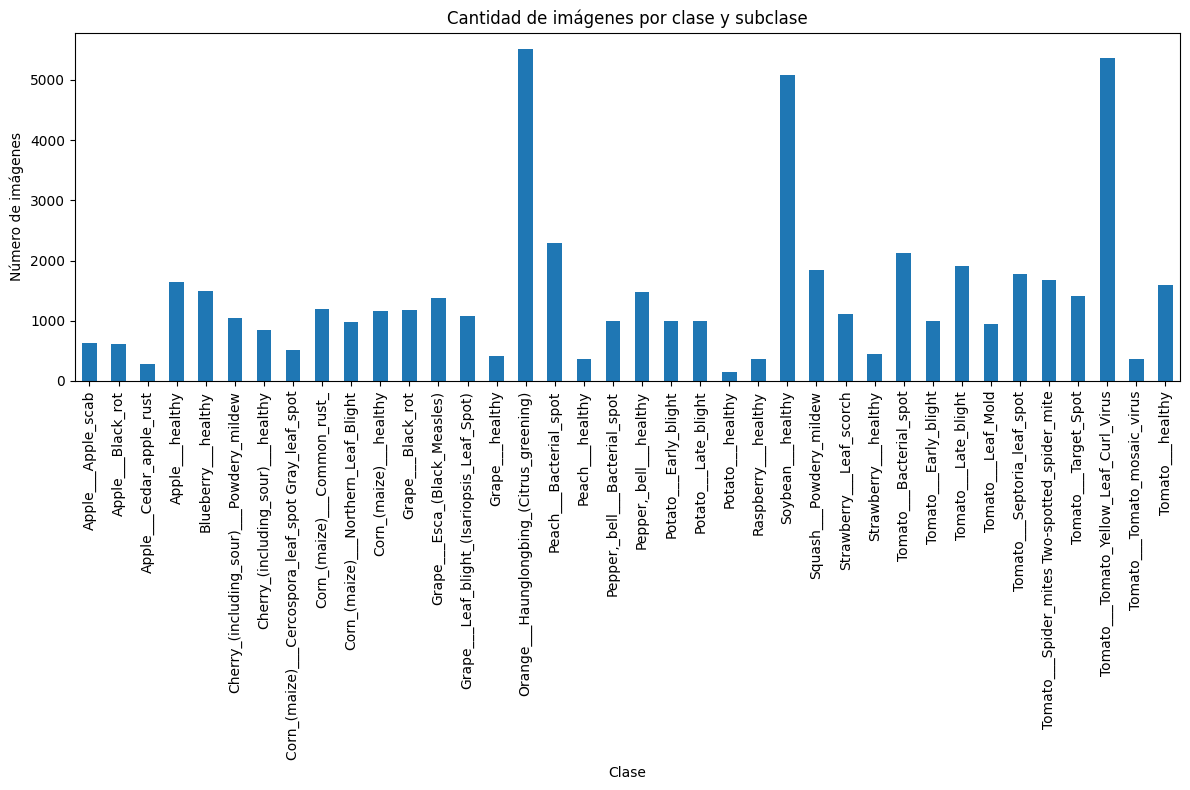

In [ ]:
# 1. Ruta al dataset y modo “color”
BASE_DIR = r'./plantvillage dataset'   # ajústalo a tu carpeta real
MODE     = 'color'
MODE_DIR = os.path.join(BASE_DIR, MODE)

# 2. Cuenta imágenes por clase
counts = {}
for cls in sorted(os.listdir(MODE_DIR)):  # sorted() para el orden alfabético
    cls_path = os.path.join(MODE_DIR, cls)
    if os.path.isdir(cls_path):
        counts[cls] = sum(
            1 for f in os.listdir(cls_path)
            if os.path.isfile(os.path.join(cls_path, f))
        )

# 3. DataFrame ordenado alfabéticamente
df = pd.DataFrame.from_dict(counts, orient='index', columns=['n_images'])
df = df.sort_index()  # redundante si usas sorted() arriba, pero por seguridad

# 4. Bar‐plot
plt.figure(figsize=(12,8))
df['n_images'].plot.bar()
plt.title('Cantidad de imágenes por clase y subclase')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


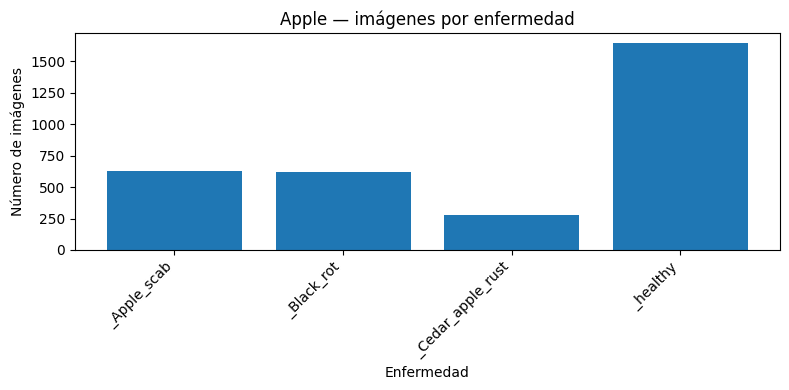

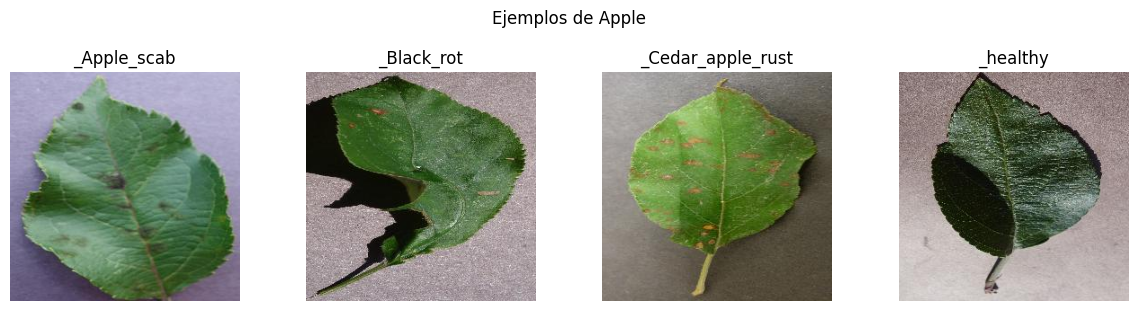

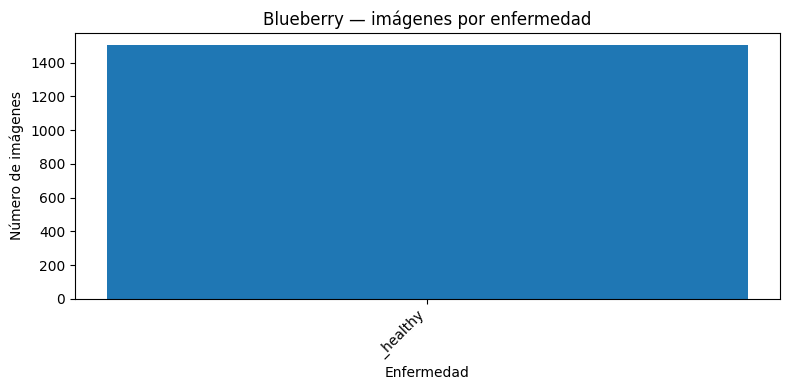

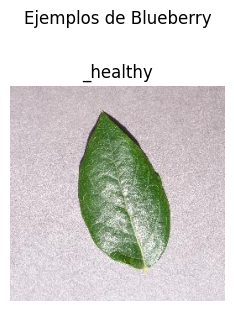

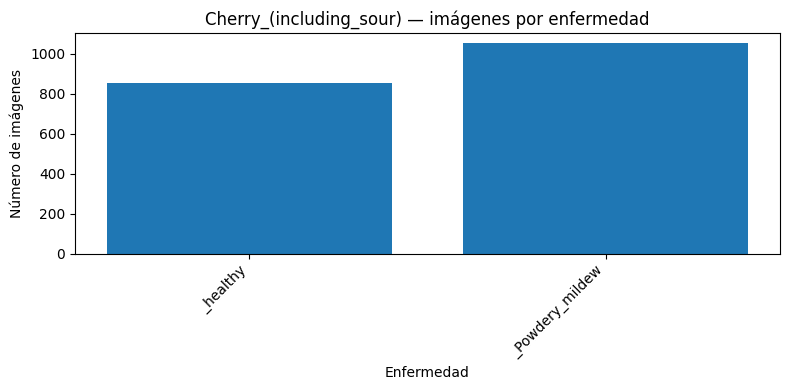

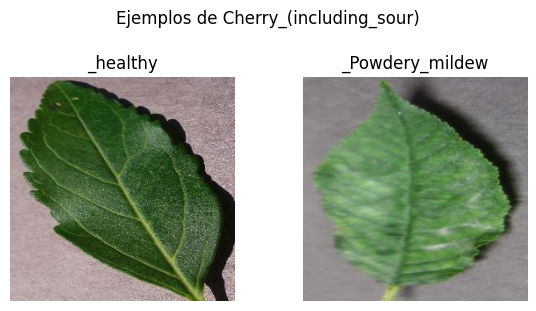

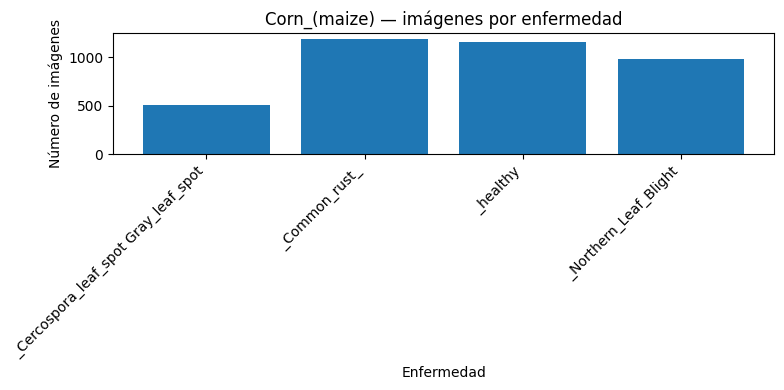

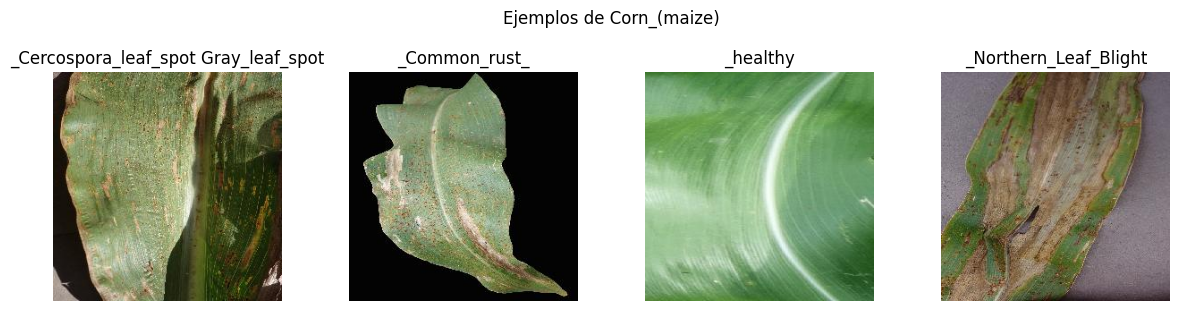

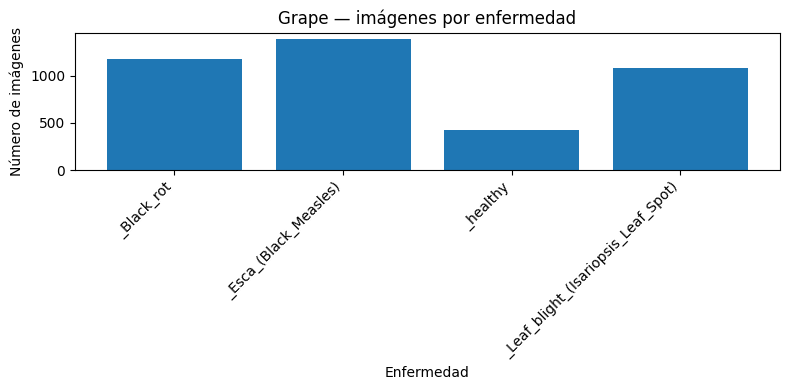

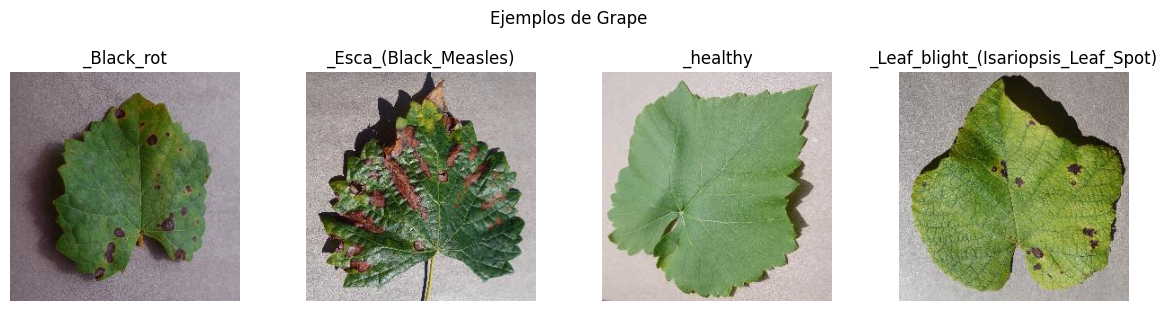

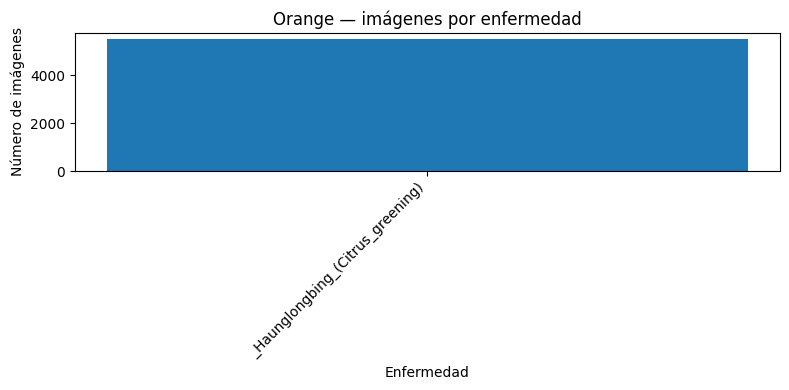

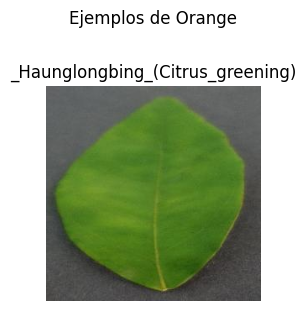

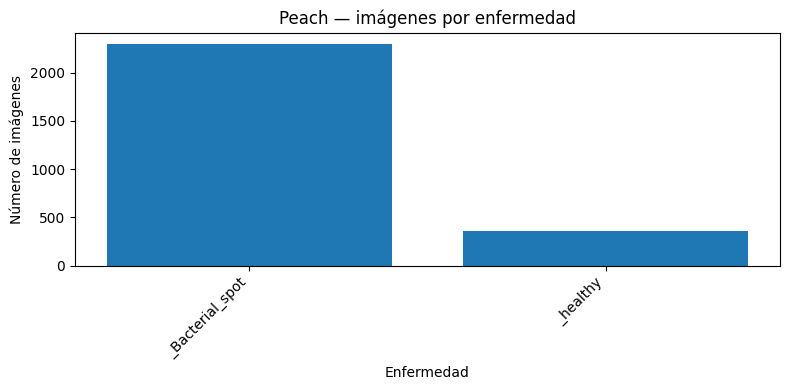

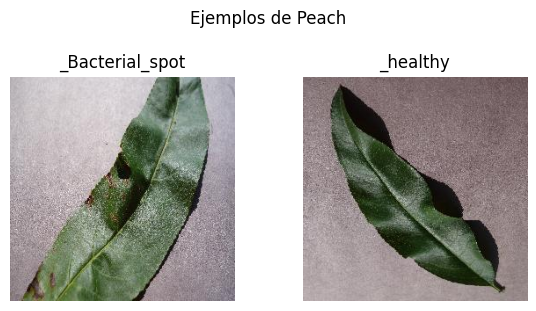

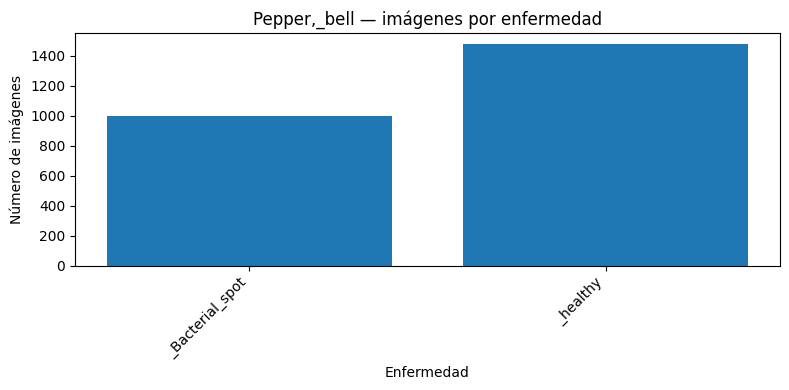

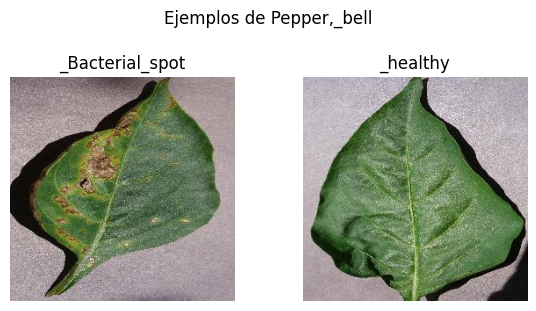

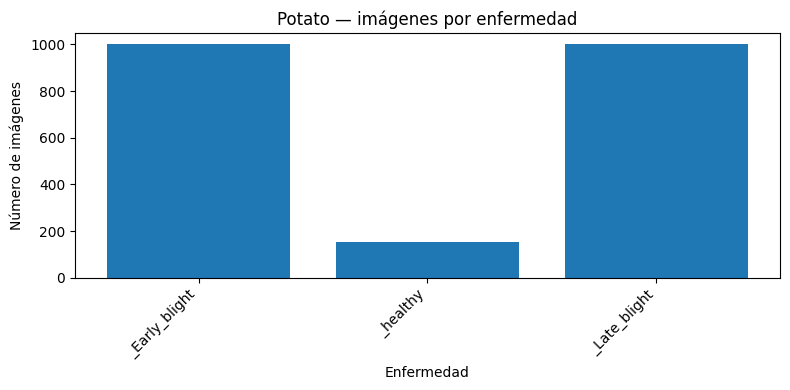

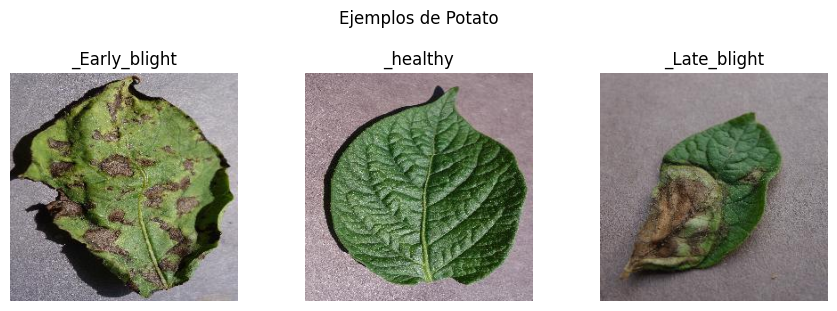

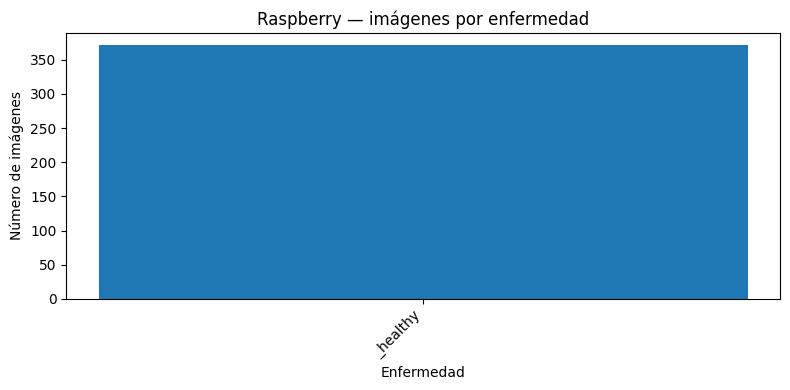

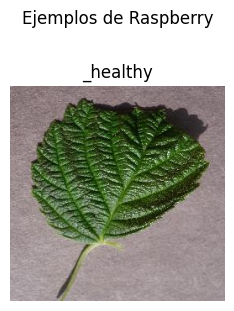

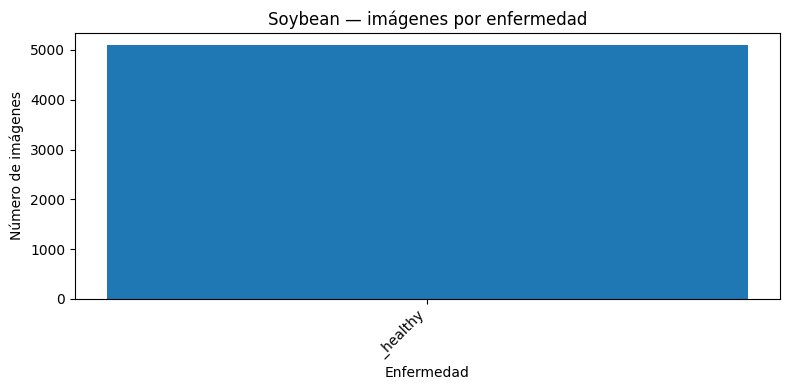

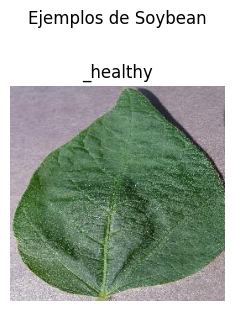

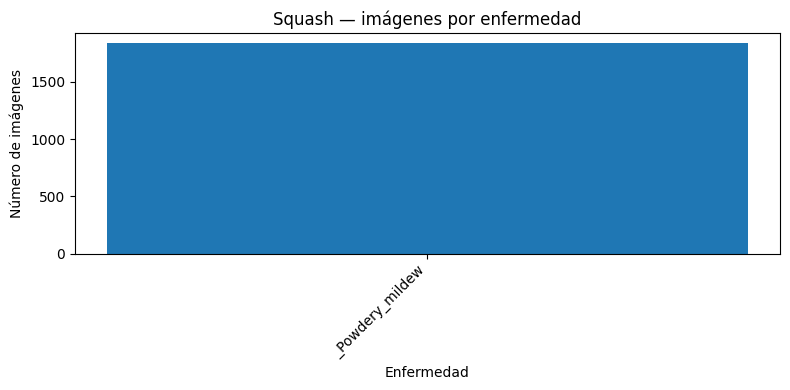

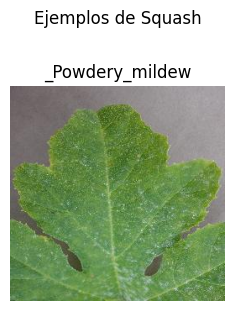

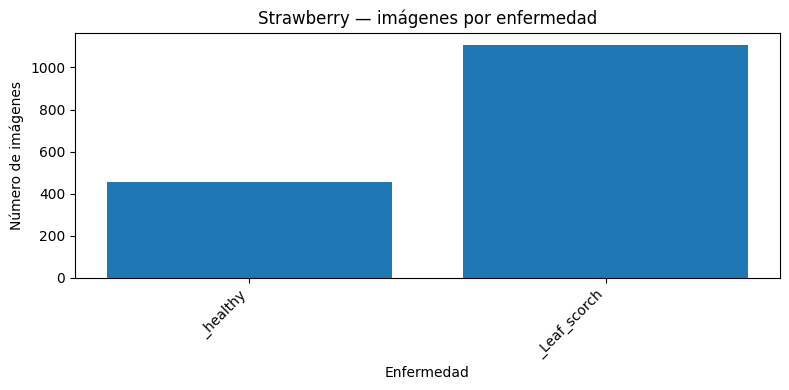

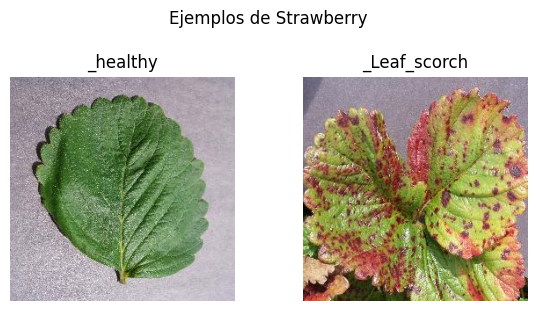

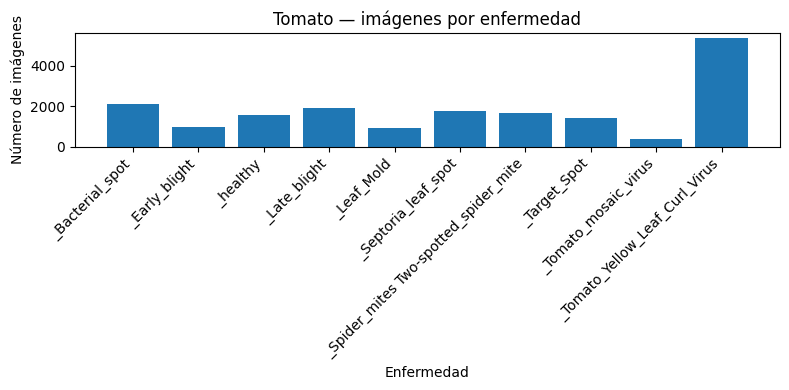

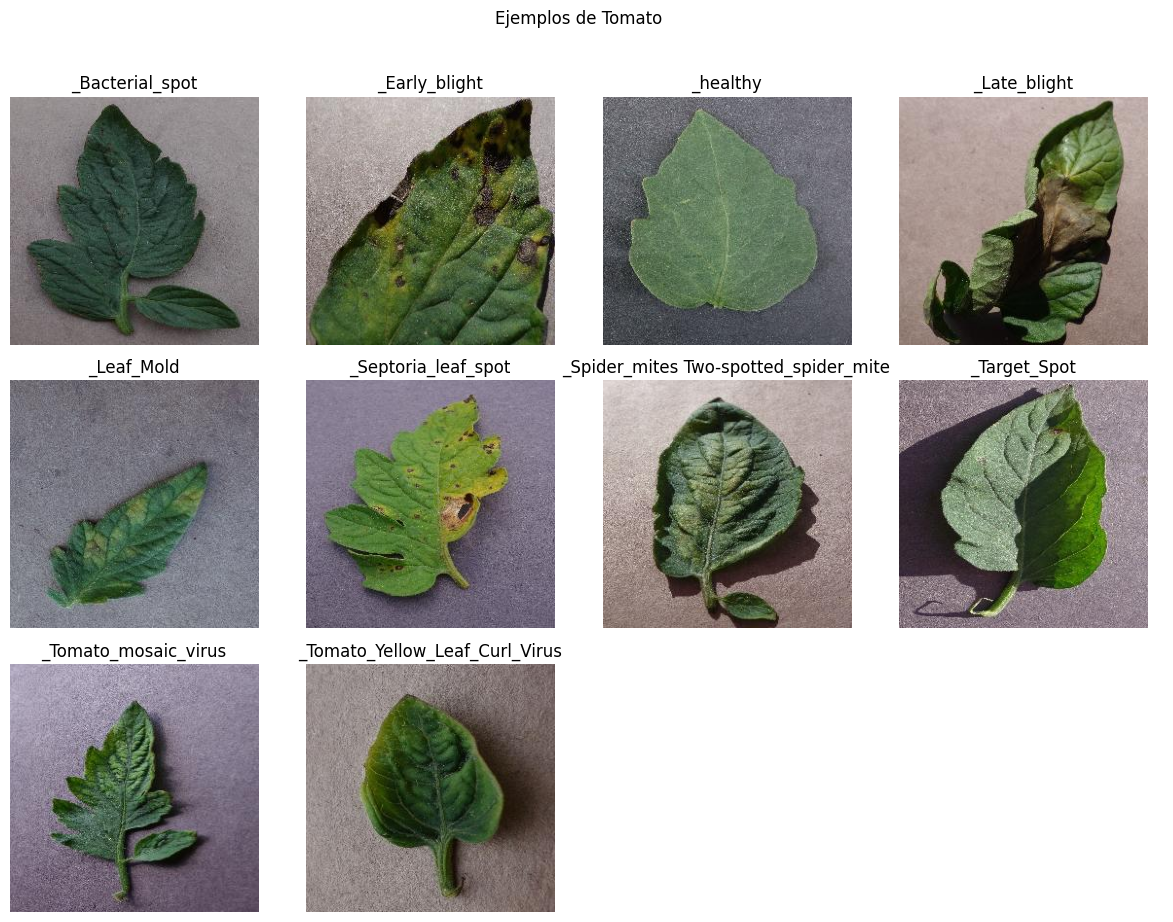

In [ ]:
# 2. Agrupa las clases por cultivo
grouped = defaultdict(list)
for cls in os.listdir(MODE_DIR):
    if "__" in cls:
        crop, disease = cls.split("__", 1)
        grouped[crop].append((disease, cls))

# 3. Para cada cultivo...
for crop, entries in grouped.items():
    # a) Histograma de conteos por enfermedad
    diseases, full_names = zip(*entries)
    counts = [ sum(1 for f in os.listdir(os.path.join(MODE_DIR, fn))
                   if os.path.isfile(os.path.join(MODE_DIR, fn, f)))
               for fn in full_names ]

    plt.figure(figsize=(8,4))
    plt.bar(diseases, counts)
    plt.title(f'{crop} — imágenes por enfermedad')
    plt.xlabel('Enfermedad')
    plt.ylabel('Número de imágenes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # b) Ejemplos de cada enfermedad
    n_cols = min(len(entries), 4)
    n_rows = (len(entries) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))

    # Normaliza axes a lista
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    for ax, (disease, fn) in zip(axes, entries):
        folder = os.path.join(MODE_DIR, fn)
        img_file = next(f for f in os.listdir(folder)
                        if f.lower().endswith(('.jpg','.png')))
        img = Image.open(os.path.join(folder, img_file))
        ax.imshow(img)
        ax.set_title(disease)
        ax.axis('off')

    # Deshabilita ejes sobrantes
    for ax in axes[len(entries):]:
        ax.axis('off')

    plt.suptitle(f'Ejemplos de {crop}', y=1.02)
    plt.tight_layout()
    plt.show()

# Cómo continuar
1. Se definirá a clase como cultivo y a enfermedad como subclase (tags)
2. Se generará data augmentation dentro de cada clase para igualar la cantindad de elementos entre subclases
